## **Presentación del Dataset**

Este conjunto de datos es un registro detallado de transacciones financieras realizadas con tarjetas de crédito, diseñado para el análisis y detección de fraudes. Contiene 555,719 instancias y 22 atributos, abarcando tanto datos categóricos como numéricos. No presenta valores nulos, asegurando la integridad y completitud del conjunto de datos.
El conjunto de datos lo usaremos para el análisis de fraudes en transacciones con tarjetas de crédito, buscando identificar patrones y características comunes en las transacciones fraudulentas en comparación con las legítimas.


## **Atributos**

*   **trans_date_trans_time:** Fecha y hora de la transacción.
*   **cc_num:** Número de la tarjeta de crédito.
*   **merchant:** La empresa o negocio envuelta en la transacción.
*   **category:** Categoría del producto o servicio adquirido.
*   **amt:** Monto de la transacción.
*   **first:** Nombre del dueño de la tarjeta de crédito.
*   **last:** Apellido del dueño de la tarjeta de crédito.
*   **gender:** Género del dueño de la tarjeta.
*   **street:** Dirección del dueño de la tarjeta.
* **city:** Ciudad del dueño de la tarjeta.
* **state:** Estado del dueño de la tarjeta.
* **zip:** Código zip del dueño de la tarjeta.
* **lat:** Latitud de la ubicación del dueño.
* **long:** Longitud de la ubicación del dueño.
* **city_pop:** Población de la ciudad donde vive el dueño.
* **job:** Puesto de trabajo del titular de la tarjeta
* **dob:** Fecha de nacimiento del dueño de la tarjeta.
* **trans_num:** ID de la transacción.
* **unix_time:** Momento de la transacción en formato Unix.
* **merch_lat:** Latitud de la empresa.
* **merch_long:** Longitud de la empresa.
* **is_fraud:** Indicador de transacción fraudulenta (1=fraudulento, 0=legítimo)

## **Montado del Dataset e importación de librerías**

Para empezar, importaremos las librerías necesarias para cargar y trabajar sobre nuestro Dataset. Usaremos:


*   Pandas para manipular y analizar los datos.
*   NumPy para el cálculo numérico en Python.
*   Seaborn, que nos proporciona una interfaz para crear gráficos estadísticos.
*   Matplotlib, que es una biblioteca que nos permite también la cración de gráficos.
* datetime, para el manejo de fechas





In [ ]:
from datetime import datetime, date
from time import time
from google.colab import drive

import pandas as pd
import numpy as np

from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from geopandas import GeoDataFrame

from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, precision_recall_curve
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

El acceso directo a nuestro conjunto de datos está alojado en la carpeta base de nuestra cuenta de Drive.

In [ ]:
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/datasets/fraud_test.csv", index_col=[0])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Análisis Introductorio del Dataset**

Hacemos uso de *.info* para obtener una visión rápida de la estructura de los datos que incluye el número de registros, los nombres de las columnas, el tipo de dato para cada una y la cantidad de valores no nulos por columna.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  float64
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-null  i

Como podemos ver, el conjunto de datos está completo al no presentar datos nulos en ninguna columna.

A modo de visualización, se muestran las primeras filas de nuestro conjunto de datos haciendo uso de *.head* .

In [ ]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


Procedemos a contar la cantidad de transacciones fraudulentas y no fraudulentas

In [ ]:
data_fraudes = data.groupby('is_fraud').size()
print(data_fraudes)

is_fraud
0    553574
1      2145
dtype: int64


Observamos que del total de transacciones, sólo el 0,3% han sido catalogadas como fraudulentas. Este imbalance de datos será importante tenerlo en cuenta a la hora de entrenar nuestros modelos de Machine Learning.

Se usa *.describe* para obtener un resumen estadístico de las columnas numéricas, como ser el numero de valores no nulos, la media aritmética, la desviación estándar, el valor mínimo, los percentiles y el valor máximo.

In [ ]:
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


## **Preprocesamiento de Datos**

A fines de mejorar la calidad de nuestros modelos y análisis de nuestros datos, realizamos las siguientes transformaciones en el dataset:

1. **Separar fecha y hora de transacción:** De la columna "trans_date_trans_time" vamos a crear 2 columnas, una con la fecha de la transacción, y otra con la hora (vamos a eliminar los minutos)

2. **Obtener día de semana:** Crearemos una columna extra con el nombre del día de la semana.

3. **Cálculo de edad**: Para mejorar la visualización de los datos, vamos a procesar la edad en base a la fecha de nacimiento de los usuarios y a la fecha de la transacción.

4. **Agrupamiento de trabajos**: Existen 478 diferentes trabajos en el dataset. Si quisiéramos utilizar esta columna en un modelo de ML, éste se demoraría demasiado en entrenarse. De igual forma, podemos reducir la cantidad de valores únicos para la etapa de visualización de datos.

In [ ]:
def day_of_week(date_str):
    day = {
        0: 'Lunes',
        1: 'Martes',
        2: 'Miercoles',
        3: 'Jueves',
        4: 'Viernes',
        5: 'Sabado',
        6: 'Domingo'
    }
    day_num = day[date_str.weekday()]
    return day_num


def calculate_age(row):
    born = datetime.strptime(row['dob'], "%d/%m/%Y").date()
    trans = row['fecha_trans']
    return trans.year - born.year - ((trans.month, trans.day) < (born.month, born.day))


def preprocesar_data(data):

    # Separar fecha y hora de transaccion
    data['fecha_trans'] = data['trans_date_trans_time'].apply(lambda x: datetime.strptime(x, "%d/%m/%Y %H:%M").date())
    data['hora_trans'] = data['trans_date_trans_time'].apply(lambda x: datetime.strptime(x, "%d/%m/%Y %H:%M").hour)

    # Obtener dia de semana
    data['dia_semana'] = data['fecha_trans'].apply(day_of_week)

    # Calcular edad
    data['edad'] = data.apply(calculate_age, axis=1)

    # Pasamos todos los datos a lower case
    data['job'] = data['job'].str.lower()

    # En caso de contener una coma, extraemos solo la primera parte
    data['job'] = data['job'].apply(lambda x: x.split(',')[0] if ',' in x else x)

    return data

In [ ]:
data = preprocesar_data(data)

Nuestras nuevas columnas se ven así:

In [ ]:
data[['fecha_trans', 'hora_trans', 'dia_semana', 'edad', 'job']].head()

,fecha_trans,hora_trans,dia_semana,edad,job
0,2020-06-21,12,Domingo,52,mechanical engineer
1,2020-06-21,12,Domingo,30,sales professional
2,2020-06-21,12,Domingo,49,librarian
3,2020-06-21,12,Domingo,32,set designer
4,2020-06-21,12,Domingo,64,furniture designer


## **Visualización de Datos**


### 1. ¿Qué tipo de compras se realizaron? ¿Cuántas se tildaron como fraudulentas?

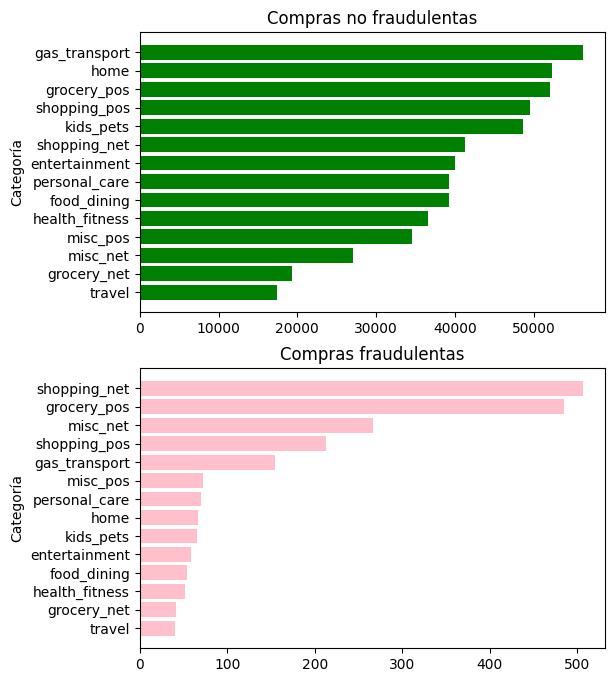

In [ ]:
cat_sin_fraude = data[data['is_fraud']==0].groupby('category').size().sort_values()
cat_con_fraude = data[data['is_fraud']==1].groupby('category').size().sort_values()

fig, ax = plt.subplots(2, 1, figsize=(6,8))
ax[0].barh(y=cat_sin_fraude.index, width=cat_sin_fraude, color='green')
ax[0].set_title('Compras no fraudulentas')
ax[0].set_ylabel('Categoría')
ax[1].barh(y=cat_con_fraude.index, width=cat_con_fraude, color='pink')
ax[1].set_title('Compras fraudulentas')
ax[1].set_ylabel('Categoría')
plt.show()

Podemos observar que la mayor parte de transacciones fraudulentas detectadas han sido en compras de artículos de shopping por internet, y en compras realizadas en almacenes o quioscos.

### 2. ¿Cómo se distribuyen las transacciones en base al género de la persona?

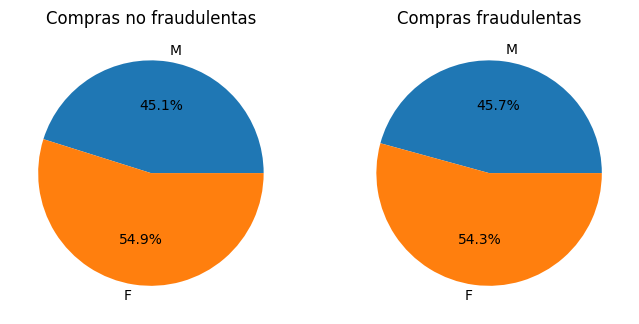

In [ ]:
gen_sin_fraude = data[data['is_fraud']==0].groupby('gender').size().sort_values()
gen_con_fraude = data[data['is_fraud']==1].groupby('gender').size().sort_values()

fig, ax = plt.subplots(1, 2, figsize=(8,6))
ax[0].pie(gen_sin_fraude, labels=gen_sin_fraude.index, autopct='%1.1f%%')
ax[0].set_title('Compras no fraudulentas')
ax[1].pie(gen_con_fraude, labels=gen_con_fraude.index, autopct='%1.1f%%')
ax[1].set_title('Compras fraudulentas')
plt.show()

Observamos que, si bien han sido mujeres quienes han realizado más transacciones, la distribución entre las fraudulentas y no fraudulentas son aproximadamente iguales, por lo que en primera instancia se puede asumir que no hay correlación entre el género y si una transacción es fraudulenta.

### 3. ¿Cuál es la distribución de las edades de los usuarios?

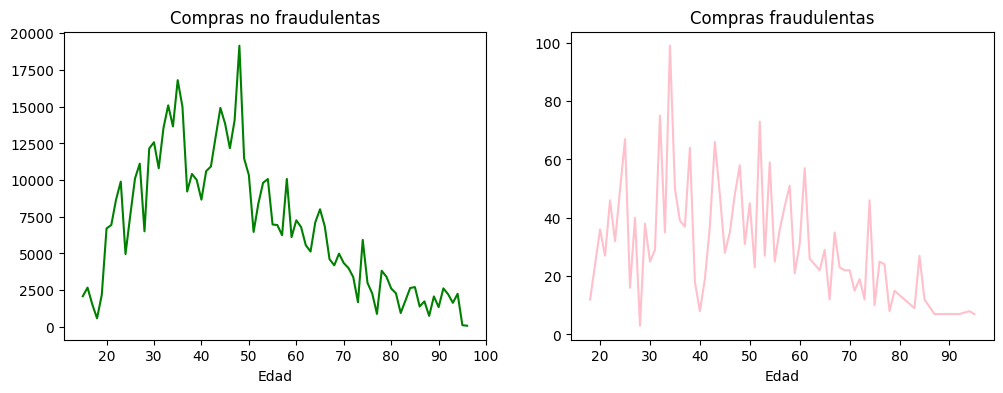

In [ ]:
edad_sin_fraude = data[data['is_fraud']==0].groupby('edad').size().sort_index()
edad_con_fraude = data[data['is_fraud']==1].groupby('edad').size().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].plot(edad_sin_fraude.index, edad_sin_fraude, color='green')
ax[0].set_title('Compras no fraudulentas')
ax[0].set_xlabel('Edad')
ax[1].plot(edad_con_fraude.index, edad_con_fraude, color='pink')
ax[1].set_title('Compras fraudulentas')
ax[1].set_xlabel('Edad')
plt.show()

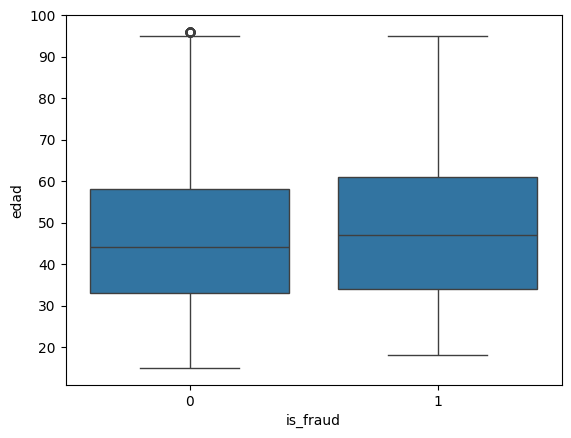

In [ ]:
sns.boxplot(data=data, y='edad', x='is_fraud');

Observando los dos gráficos, vemos que no existe una diferencia significativa entre las distribuciones de edades para las personas que cometen fraude como para las que no.

### 4. ¿En qué días se realizaron las transacciones?

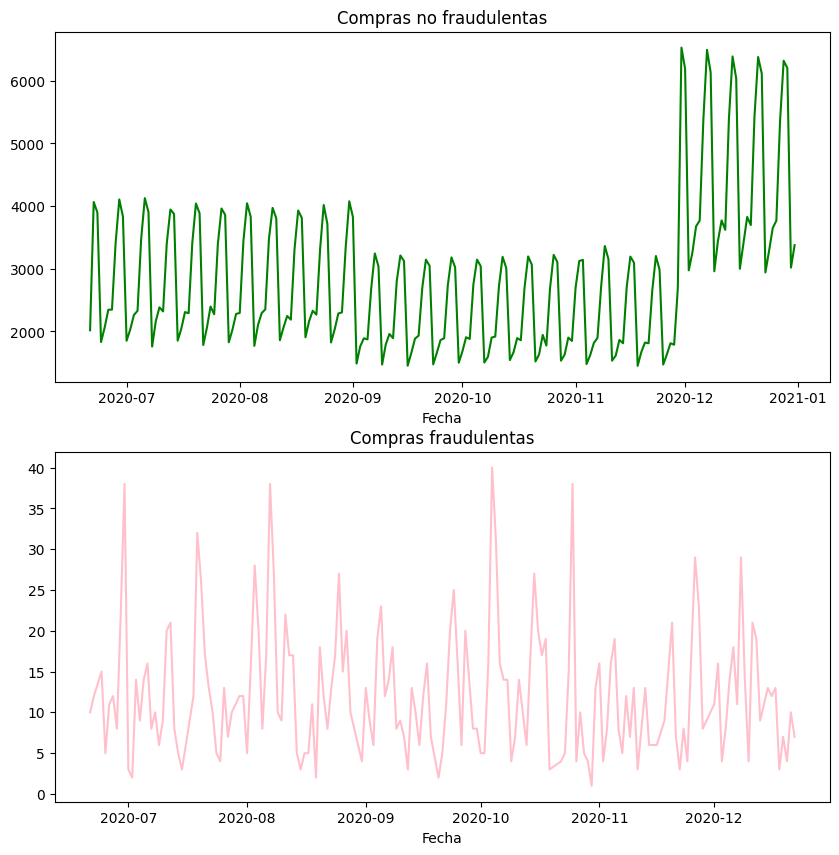

In [ ]:
cat_sin_fraude = data[data['is_fraud']==0].groupby('fecha_trans').size().sort_index()
cat_con_fraude = data[data['is_fraud']==1].groupby('fecha_trans').size().sort_index()

fig, ax = plt.subplots(2, 1, figsize=(10,10))
ax[0].plot(cat_sin_fraude.index, cat_sin_fraude, color='green')
ax[0].set_title('Compras no fraudulentas')
ax[0].set_xlabel('Fecha')
ax[1].plot(cat_con_fraude.index, cat_con_fraude, color='pink')
ax[1].set_title('Compras fraudulentas')
ax[1].set_xlabel('Fecha')
plt.show()

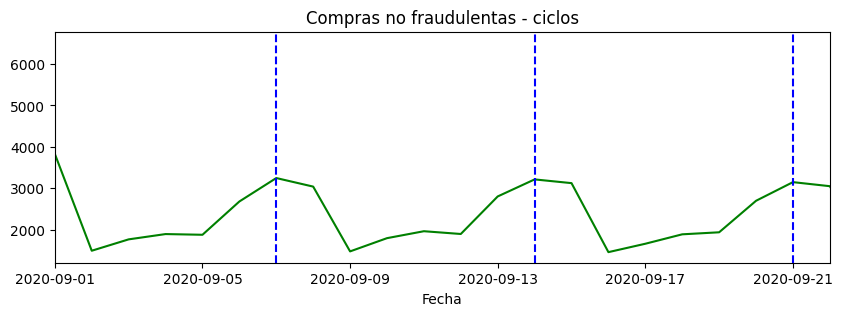

In [ ]:
cat_sin_fraude = data[data['is_fraud']==0].groupby('fecha_trans').size().sort_index()
cat_con_fraude = data[data['is_fraud']==1].groupby('fecha_trans').size().sort_index()

fig, ax = plt.subplots(1, 1, figsize=(10,3))
ax.plot(cat_sin_fraude.index, cat_sin_fraude, color='green')
ax.axvline(datetime.strptime('2020-09-07', '%Y-%m-%d'), color = 'b', linestyle='--')
ax.axvline(datetime.strptime('2020-09-14', '%Y-%m-%d'), color = 'b', linestyle='--')
ax.axvline(datetime.strptime('2020-09-21', '%Y-%m-%d'), color = 'b', linestyle='--')
ax.set_title('Compras no fraudulentas - ciclos')
ax.set_xlabel('Fecha')
ax.set_xlim(date(2020, 9, 1), date(2020, 9, 22))
plt.show()

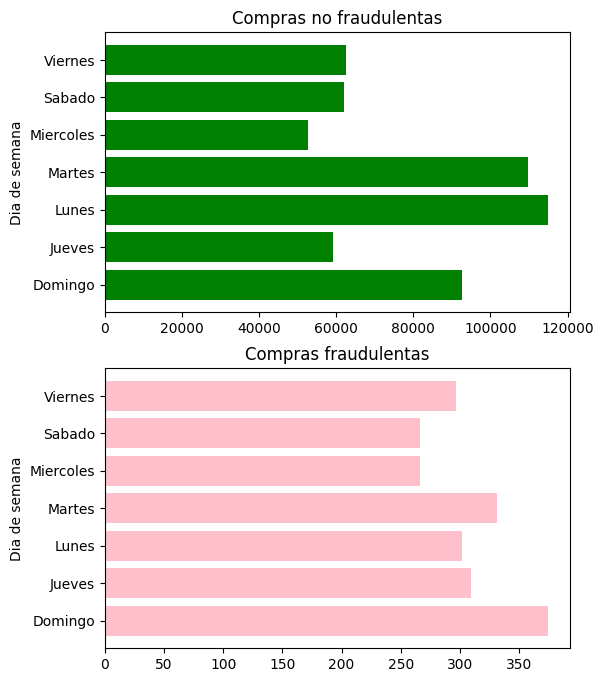

In [ ]:
dia_sin_fraude = data[data['is_fraud']==0].groupby('dia_semana').size()
dia_con_fraude = data[data['is_fraud']==1].groupby('dia_semana').size()

fig, ax = plt.subplots(2, 1, figsize=(6,8))
ax[0].barh(y=dia_sin_fraude.index, width=dia_sin_fraude, color='green')
ax[0].set_title('Compras no fraudulentas')
ax[0].set_ylabel('Dia de semana')
ax[1].barh(y=dia_con_fraude.index, width=dia_con_fraude, color='pink')
ax[1].set_title('Compras fraudulentas')
ax[1].set_ylabel('Dia de semana')
plt.show()

Podemos destacar varios puntos de estos gráficos:
* Por parte de las compras no fraudulentas, vemos que las compras presentan un componente cíclico, donde se presentan picos a intervalos constantes cada 7 días. Por otro lado, observamos que el promedio de estos ciclos fue variando entre trimestre.
* Por parte de las compras fraudulentas, se observa que no se presenta este componente cíclico, ni tampoco se presentan valores constantes. No se visualiza ningún patrón como en las compras no fraudulentas.

### 5. ¿En qué horas se realizaron las transacciones?

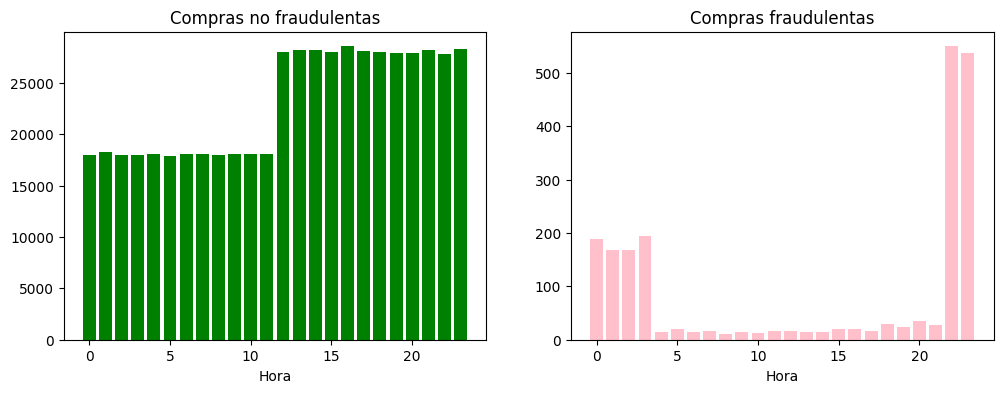

In [ ]:
cat_sin_fraude = data[data['is_fraud']==0].groupby('hora_trans').size().sort_index()
cat_con_fraude = data[data['is_fraud']==1].groupby('hora_trans').size().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].bar(x=cat_sin_fraude.index, height=cat_sin_fraude, color='green')
ax[0].set_title('Compras no fraudulentas')
ax[0].set_xlabel('Hora')
ax[1].bar(x=cat_con_fraude.index, height=cat_con_fraude, color='pink')
ax[1].set_title('Compras fraudulentas')
ax[1].set_xlabel('Hora')
plt.show()

Se observa claramente que las compras fraudulentas se realizan principalmente entre las 22 y 04 horas, mientras que las compras no fraudulentas no varían significativamente durante el tiempo.

### 6. ¿Cuál es la distribución de los montos de las transacciones?

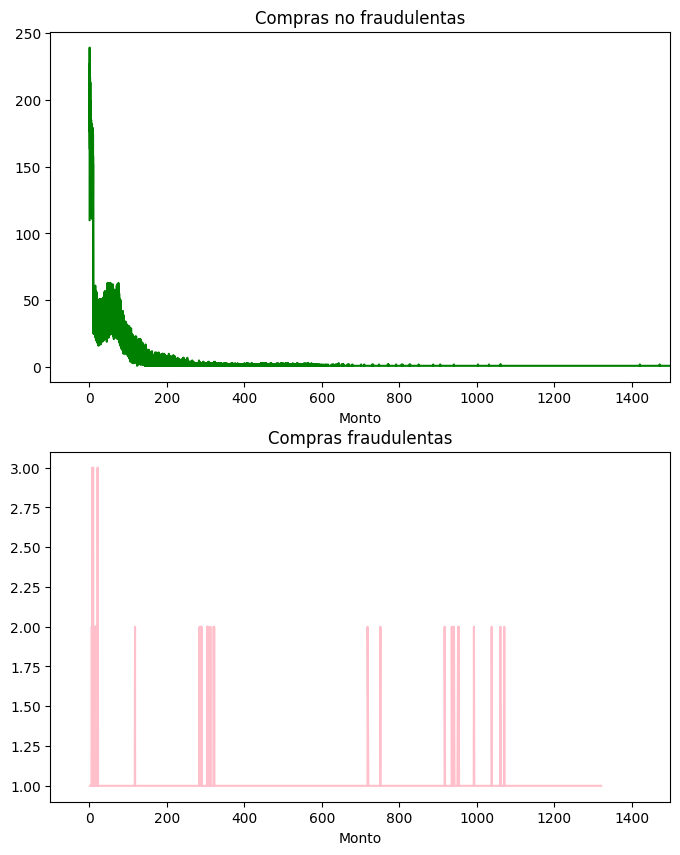

In [ ]:
cat_sin_fraude = data[data['is_fraud']==0].groupby('amt').size().sort_index()
cat_con_fraude = data[data['is_fraud']==1].groupby('amt').size().sort_index()

fig, ax = plt.subplots(2, 1, figsize=(8,10))
ax[0].plot(cat_sin_fraude.index, cat_sin_fraude, color='green')
ax[0].set_title('Compras no fraudulentas')
ax[0].set_xlim(-100, 1500)
ax[0].set_xlabel('Monto')
ax[1].plot(cat_con_fraude.index, cat_con_fraude, color='pink')
ax[1].set_title('Compras fraudulentas')
ax[1].set_xlim(-100, 1500)
ax[1].set_xlabel('Monto')
plt.show()

Podemos observar que las compras no fraudulentas representan una distribución exponencial decreciente, donde gran parte de los montos se encuentran entre los montos 0 y 200, y se va extendiendo a menor medida en montos mayores.

Por otro lado, vemos que las compras fraudulentas representan una distribución uniforme entre los montos 0 y 1300.

### 7. ¿Cómo se distribuyen los usuarios geográficamente?

Para el análisis geográfico de los usuarios, vamos a utilizar geopandas, una librería que nos permitirá graficar puntos en base a la longitud y latitud de cada usuario dentro de un mapa de Estados Unidos.

<ipython-input-19-7a1eed34b30f>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'));
<ipython-input-19-7a1eed34b30f>:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


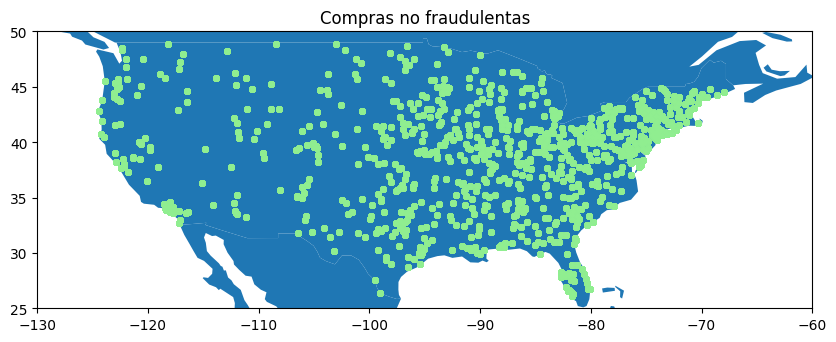

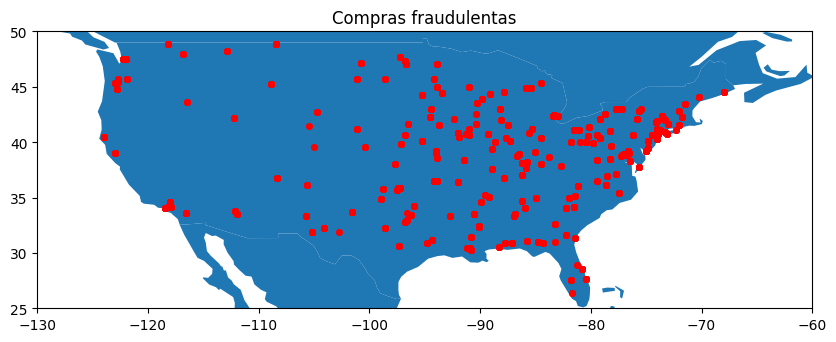

In [ ]:
# Mapa de compras no fraudulentas
data_no_fraud = data[data['is_fraud']==0]
geometry = [Point(xy) for xy in zip(data_no_fraud['long'], data_no_fraud['lat'])]
gdf = GeoDataFrame(data_no_fraud, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'));
ax = world.plot(figsize=(10, 6))
gdf.plot(ax=ax, marker='o', color='lightgreen', markersize=15)
ax.set_xlim(-130, -60)
ax.set_ylim(25, 50)
ax.set_title('Compras no fraudulentas')

# Mapa de compras fraudulentas
data_fraud = data[data['is_fraud']==1]
geometry = [Point(xy) for xy in zip(data_fraud['long'], data_fraud['lat'])]
gdf = GeoDataFrame(data_fraud, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6))
gdf.plot(ax=ax, marker='o', color='red', markersize=15);
ax.set_xlim(-130, -60)
ax.set_ylim(25, 50)
ax.set_title('Compras fraudulentas');

Observamos a simple vista que la mayoría de las compras fraudulentas ocurren en los estados del este de Estados Unidos.

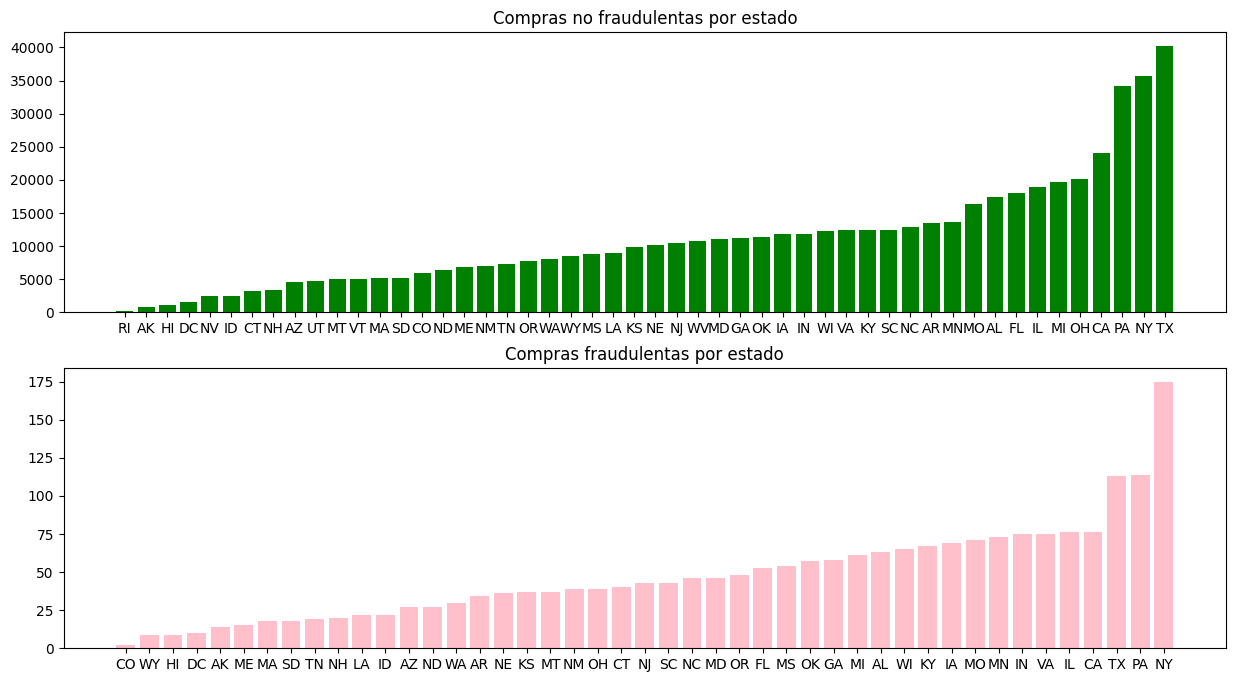

In [ ]:
cat_sin_fraude = data[data['is_fraud']==0].groupby('state').size().sort_values()
cat_con_fraude = data[data['is_fraud']==1].groupby('state').size().sort_values()

fig, ax = plt.subplots(2, 1, figsize=(15,8))
ax[0].bar(x=cat_sin_fraude.index, height=cat_sin_fraude, color='green')
ax[0].set_title('Compras no fraudulentas por estado')
ax[1].bar(x=cat_con_fraude.index, height=cat_con_fraude, color='pink')
ax[1].set_title('Compras fraudulentas por estado')
plt.show()

Graficando la distribución por estado, vemos que las proporciones se mantienen.

### 8. ¿En qué trabajan los usuarios de las tarjetas de crédito?

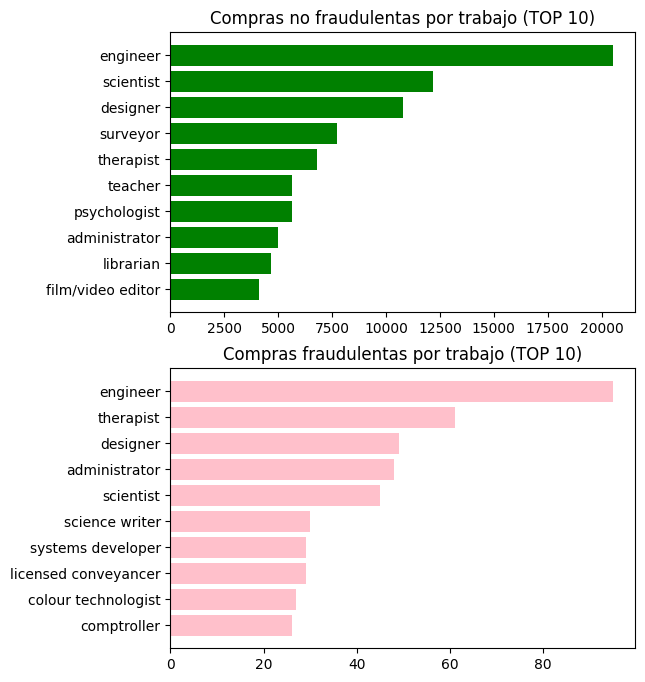

In [ ]:
cat_sin_fraude = data[data['is_fraud']==0].groupby('job').size().nlargest(n=10, keep='first').sort_values()
cat_con_fraude = data[data['is_fraud']==1].groupby('job').size().nlargest(n=10, keep='first').sort_values()

fig, ax = plt.subplots(2, 1, figsize=(6,8))
ax[0].barh(y=cat_sin_fraude.index, width=cat_sin_fraude, color='green')
ax[0].set_title('Compras no fraudulentas por trabajo (TOP 10)')
ax[1].barh(y=cat_con_fraude.index, width=cat_con_fraude, color='pink')
ax[1].set_title('Compras fraudulentas por trabajo (TOP 10)')
plt.show()

Observamos que, si bien los ingenieros, terapeutas y diseñadores son los roles que más cometieron fraude, estos roles también fueron los que más transacciones hicieron en total. En conclusión, las distribuciones se mantienen y no hay un cambio significativo entre ambos gráficos.

## **Feature Engineering**

Con el fin de que nuestros modelos puedan utilizar todas las columnas, realizaremos las siguientes modificaciones a nuestro dataset:

1. **Implementar One-Hot Encoding en las columnas género, categoría de compra y ocupaciones**: para las dos últimas columnas, implementaremos el mismo en base al TOP 10 de cada columna, sumando una columna 'others' para aquellos casos que no entren en el top.

2. **Implementar Label Encoding para cada trimestre**: En base a las fechas de transacciones, catalogaremos los trimestres en una nueva columna, siendo de menor valor numérico aquellos trimestres más antiguos.

3. **Implementar Cyclic Encoding para los días y horas**: Imputaremos el seno y coseno para los días y horas, teniendo en cuenta un ciclo de 7 días y un ciclo de 24 horas respectivamente.

4. **Eliminar las columnas no aptas para entrenar**: Estas consisten principalmente de columnas ya procesadas o que no entregan valor al dataset (como el ID de transacción). También se eliminan las columnas relacionadas a la ubicación del cliente exceptuando la latitud y longitud, para evitar correlación entre features.

In [ ]:
def feature_engineering(df):

    ###################
    # ONE-HOT ENCODING
    ###################

    # Columna género
    df["gender"] = df["gender"].apply(lambda x: 1 if x == "M" else 0)

    # Columna categorias de compras
    top_10_categories = df['category'].value_counts().nlargest(10).index
    df['category'] = df['category'].apply(lambda x: x if x in top_10_categories else 'other')
    df = pd.get_dummies(df, columns=["category"])

    # Columna Ocupación
    top_10_jobs = df['job'].value_counts().nlargest(n=10, keep='first').index
    df['job'] = df['job'].apply(lambda x: x if x in top_10_jobs else 'other')
    df = pd.get_dummies(df, columns=["job"])

    # Reemplazar todos los True por 1 y False por 0 en las columnas que agregamos con get_dummies
    df.replace({True: 1, False: 0}, inplace=True)

    ###################
    # LABEL ENCODING
    ###################

    # Columna trimestre
    df['trimestre'] = df['fecha_trans'].apply(lambda x: (x.month - 1) // 3 + 1)

    ###################
    # CYCLIC ENCODING
    ###################

    # Columna día
    df['dia_sin'] = np.sin(pd.to_datetime(df['fecha_trans']).dt.dayofweek*2*np.pi/7)
    df['dia_cos'] = np.cos(pd.to_datetime(df['fecha_trans']).dt.dayofweek*2*np.pi/7)

    # Columna hora
    df['hora_sin'] = np.sin(df['hora_trans']*2*np.pi/24)
    df['hora_cos'] = np.cos(df['hora_trans']*2*np.pi/24)

    ###########################
    # ELIMINACIÓN DE COLUMNAS
    ###########################

    # Drop de columnas que no se usarán en el modelo
    df = df.drop(["state", "fecha_trans", 'hora_trans', 'dia_semana', 'cc_num',
                  'trans_num', 'first', 'last', 'merchant', 'street', 'zip', 'city', 'unix_time',
                  'trans_date_trans_time', 'dob'], axis=1)

    return df

data_fe = feature_engineering(data)

Nuestro dataset final es el siguiente:

In [ ]:
data_fe.head()

,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,edad,category_entertainment,...,job_psychologist,job_scientist,job_surveyor,job_teacher,job_therapist,trimestre,dia_sin,dia_cos,hora_sin,hora_cos
0,2.86,1,33.9659,-80.9355,333497,33.986391,-81.200714,0,52,0,...,0,0,0,0,0,2,-0.781831,0.62349,1.224647e-16,-1.0
1,29.84,0,40.3207,-110.4360,302,39.450498,-109.960431,0,30,0,...,0,0,0,0,0,2,-0.781831,0.62349,1.224647e-16,-1.0
2,41.28,0,40.6729,-73.5365,34496,40.495810,-74.196111,0,49,0,...,0,0,0,0,0,2,-0.781831,0.62349,1.224647e-16,-1.0
3,60.05,1,28.5697,-80.8191,54767,28.812398,-80.883061,0,32,0,...,0,0,0,0,0,2,-0.781831,0.62349,1.224647e-16,-1.0
4,3.19,1,44.2529,-85.0170,1126,44.959148,-85.884734,0,64,0,...,0,0,0,0,0,2,-0.781831,0.62349,1.224647e-16,-1.0


In [ ]:
data_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   amt                      555719 non-null  float64
 1   gender                   555719 non-null  int64  
 2   lat                      555719 non-null  float64
 3   long                     555719 non-null  float64
 4   city_pop                 555719 non-null  int64  
 5   merch_lat                555719 non-null  float64
 6   merch_long               555719 non-null  float64
 7   is_fraud                 555719 non-null  int64  
 8   edad                     555719 non-null  int64  
 9   category_entertainment   555719 non-null  int64  
 10  category_food_dining     555719 non-null  int64  
 11  category_gas_transport   555719 non-null  int64  
 12  category_grocery_pos     555719 non-null  int64  
 13  category_health_fitness  555719 non-null  int64  
 14  category_

## **Train Test Split**

Dividiremos el dataset en dos partes, una siendo los datos de entrenamiento (que abarcarán el 80% de los registros), y otra siendo los datos de test, para evaluar los modelos.

Implementaremos el parámetro **stratify**, el cual nos permitirá mantener la distribución de registros con y sin fraude en ambos dataframes.

In [ ]:
# División del conjunto de entrenamiento y test
df_train, df_test = train_test_split(data_fe, test_size=0.2, random_state=7, stratify=data_fe['is_fraud'])

## **Oversampling**

Ante la problemática del desbalance de datos que sufre el dataset, decidimos aplicar oversampling sobre los registros con fraude, de tal forma que el total sea igual que los registros sin fraude, y los modelos de Machine Learning no ignoren a los mismos.

In [ ]:
# Sobremuestreo para equiparar la desigualdad
df_train_con_fraude = df_train[df_train["is_fraud"]==1]
df_train_sin_fraude = df_train[df_train["is_fraud"]==0]
df_train_con_fraude_sobremuestreado = df_train_con_fraude.sample(n=len(df_train_sin_fraude), replace=True, random_state=7);
df_train_sobremuestreado = pd.concat([df_train_sin_fraude, df_train_con_fraude_sobremuestreado])

# División X, y (X son todas las columnas que no son la objetivo, y es la objetivo)
X_train_sobremuestreo = df_train_sobremuestreado.drop('is_fraud', axis=1)
y_train_sobremuestreo = df_train_sobremuestreado['is_fraud']
X_test = df_test.drop('is_fraud', axis=1)
y_test = df_test['is_fraud']

## **Selección de Modelos de Machine Learning**

Con la finalidad de encontrar el modelo que mejor se ajusta a nuestro problema, y sumado al interés de practicar los algoritmos más comunes, definimos que los modelos de Machine Learning que vamos a utilizar son:

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Gradient Bostiing
5. XGBoost

La información sobre cada uno se detalla en el informe.

In [ ]:
modelos = {
    'Logistic Regression': LogisticRegression(random_state=7),
    'Gradient Boosting': GradientBoostingClassifier(random_state=7),
    'Decision Tree': DecisionTreeClassifier(random_state=7),
    'Random Forest': RandomForestClassifier(random_state=7),
    'XGBoost': xgb.XGBClassifier(random_state=7)
}

## **Métricas a utilizar**

Para la selección del mejor modelo, no podemos depender de métricas como el accuracy o ROC AUC, ya que ambas no responden bien cuando hay datos desbalanceados.

Tampoco podemos utilizar el F1-Score, ya que un valor alto del mismo no siempre significa un mejor modelo, especialmente en los modelos de detección de fraude.

Por ende, utilizaremos la precision y el recall, y nuestra mejor herramienta en este caso es la curva de precision-recall.

## **Entrenamiento de Modelos**

Definimos un pipeline común de entrenamiento, que nos retornará el modelo ajustado, las predicciones correspondientes, y las métricas, para luego ser comparado entre cada modelo.

In [ ]:
def entrenar_modelo(modelo, X_train, y_train, X_test, y_test):

    # Inicio tiempo entrenamiento
    start = time()

    # Ajustar el modelo
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Predecir probabilidades
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]

    # Calcular precision-recall curve
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

    # Fin tiempo entrenamiento
    end = time()
    tiempo_entrenamiento = end - start

    # Resultados
    resultado = {
        'modelo': modelo,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'precisions': precisions,
        'recalls': recalls,
        'thresholds': thresholds,
        'tiempo_entrenamiento': tiempo_entrenamiento
    }

    return resultado

In [ ]:
resultados = {}
for modelo in modelos:
  resultados[modelo] = entrenar_modelo(modelos[modelo], X_train_sobremuestreo, y_train_sobremuestreo, X_test, y_test)

## **Resultados**

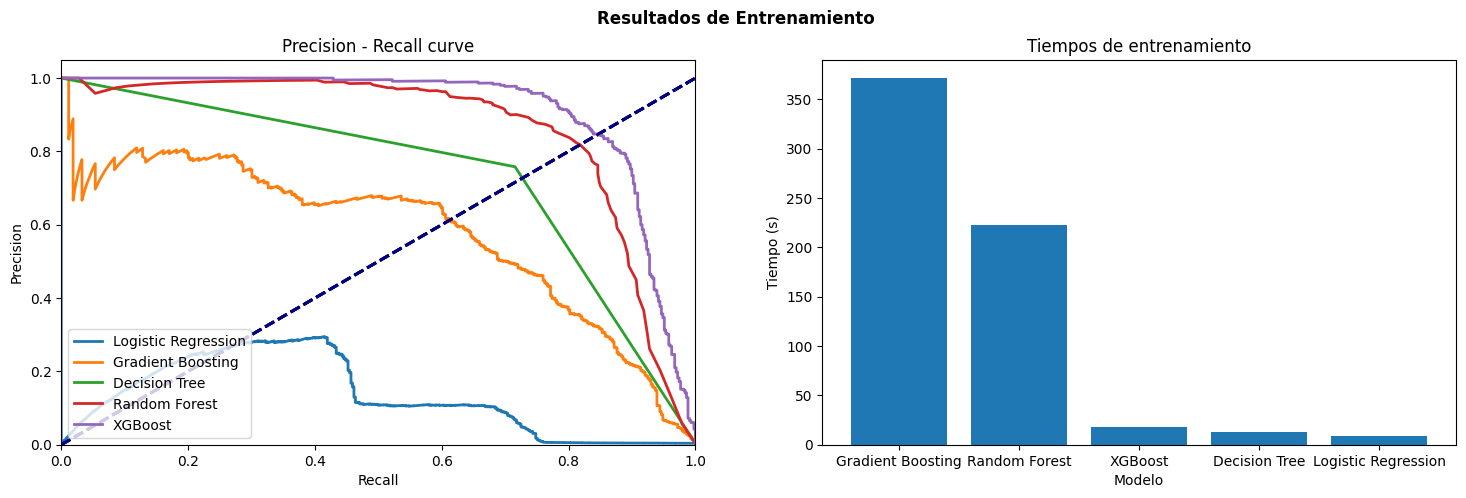

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle('Resultados de Entrenamiento', fontweight='bold')

# Gráfico de precision-recall curve
for modelo in resultados:
    ax[0].plot(resultados[modelo]['recalls'], resultados[modelo]['precisions'], lw=2, label=modelo)
    ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title('Precision - Recall curve')
ax[0].legend(loc='lower left')

# Gráfico de tiempos de entrenamiento
tiempos = pd.DataFrame({
    'modelo': list(resultados.keys()),
    'tiempo_entrenamiento': [resultados[modelo]['tiempo_entrenamiento'] for modelo in resultados]
}).sort_values('tiempo_entrenamiento', ascending=False)
ax[1].set_title('Tiempos de entrenamiento')
ax[1].bar(tiempos['modelo'], tiempos['tiempo_entrenamiento'])
ax[1].set_title('Tiempos de entrenamiento')
ax[1].set_xlabel('Modelo')
ax[1].set_ylabel('Tiempo (s)');

Podemos observar que el modelo de XGBoost fue el que mejor performó entre todos los modelos, con un tiempo de entrenamiento muy bajo.

Procedemos a graficar la precision y el recall de XGBoost en base a cada umbral de decision.

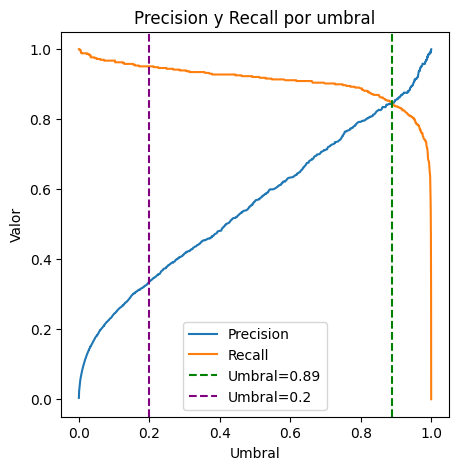

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(resultados['XGBoost']['thresholds'], resultados['XGBoost']['precisions'][1:], label='Precision')
ax.plot(resultados['XGBoost']['thresholds'], resultados['XGBoost']['recalls'][1:], label='Recall')
ax.axvline(x=0.89, color='g', linestyle='--', label='Umbral=0.89')
ax.axvline(x=0.2, color='purple', linestyle='--', label='Umbral=0.2')
ax.set_title('Precision y Recall por umbral')
ax.set_xlabel('Umbral')
ax.set_ylabel('Valor')
ax.legend();


Para cada umbral de decisión marcado, vamos a graficar la matriz de confusión.

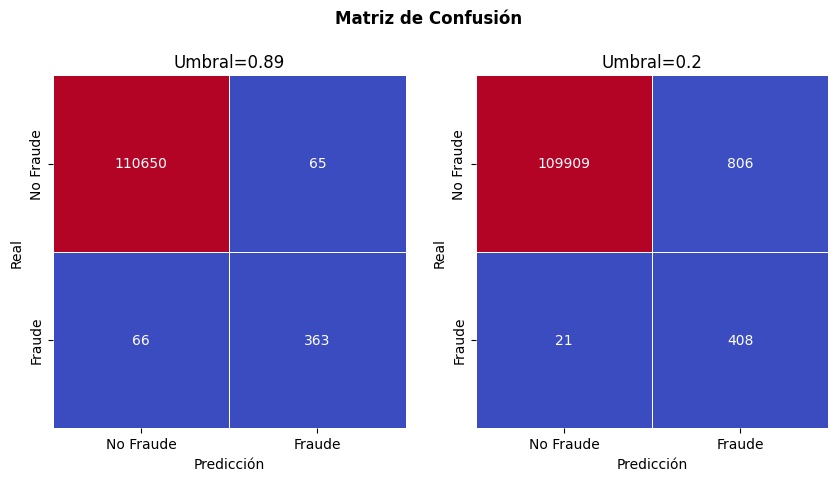

In [ ]:
umbrales = [0.89, 0.2]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Matriz de Confusión', fontweight='bold')
for i, umbral in enumerate(umbrales):
    y_pred = (resultados['XGBoost']['y_pred_proba'] > umbral).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='coolwarm', cbar=False, fmt='g', ax=ax[i])
    ax[i].set_title(f'Umbral={umbral}')
    ax[i].set_xlabel('Predicción')
    ax[i].set_ylabel('Real')
    ax[i].set_xticklabels(['No Fraude', 'Fraude'])
    ax[i].set_yticklabels(['No Fraude', 'Fraude'])

Como se observa tanto en la curva como en la matriz, a un umbral de decisión mayor, disminuimos la cantidad de falsos positivos, pero aumentos los falsos negativos (es decir, la capacidad de detectar transacciones fraudulentas disminuye).

## **Conclusiones**

Podemos concluir que si bien llegamos a un modelo dentro de todo performante, al final del día la decisión de cómo va a funcionar depende mucho del contexto de la empresa de fraude que solicite este sistema.

Si la empresa está **"enfocada en el usuario"**, entonces irá por un umbral balanceado (como por ej. 0.89), de tal forma de detectar gran parte de las transacciones fraudulentas, pero sobre todo para no generar muchos falsos positivos, lo que se podría traducir en posibles reclamos por transacciones legítimas.

Por otro lado, si la empresa está **"enfocada en el fraude"**, entonces irá por un umbral de decisión menor, de tal forma de priorizar la detección de transacciones fraudulentas, dejando en segundo plano la cantidad de falsos positivos que éste puede generar.